# Prophet

# Example

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
m = Prophet()
m.fit(df)

08:51:37 - cmdstanpy - INFO - Chain [1] start processing
08:51:38 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.523389,8.924414
3266,2017-01-16,8.531958,7.819662,9.262179
3267,2017-01-17,8.319376,7.638531,9.065741
3268,2017-01-18,8.151991,7.489774,8.908580
3269,2017-01-19,8.163908,7.484640,8.932242


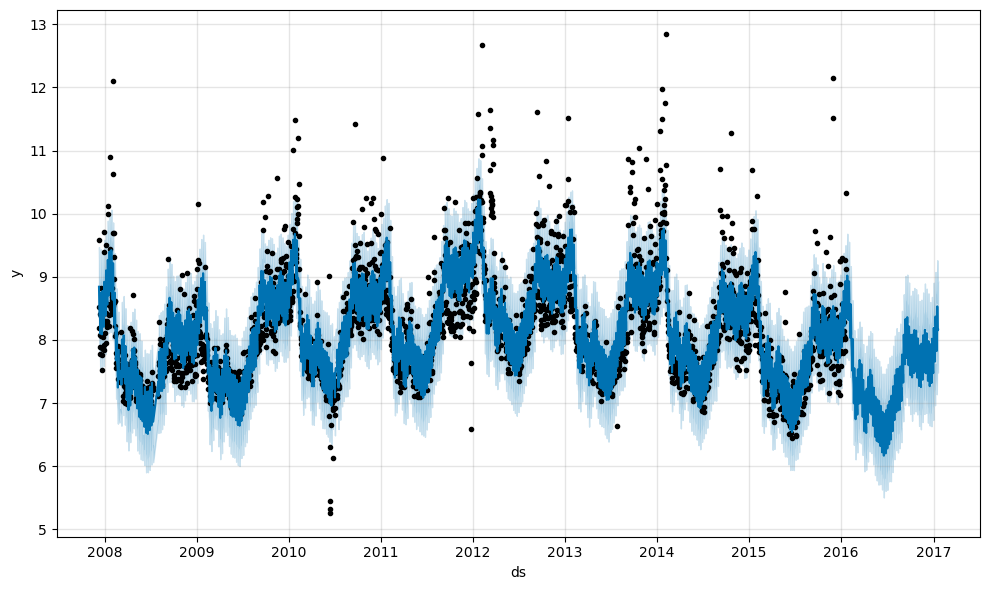

In [6]:
fig1 = m.plot(forecast)

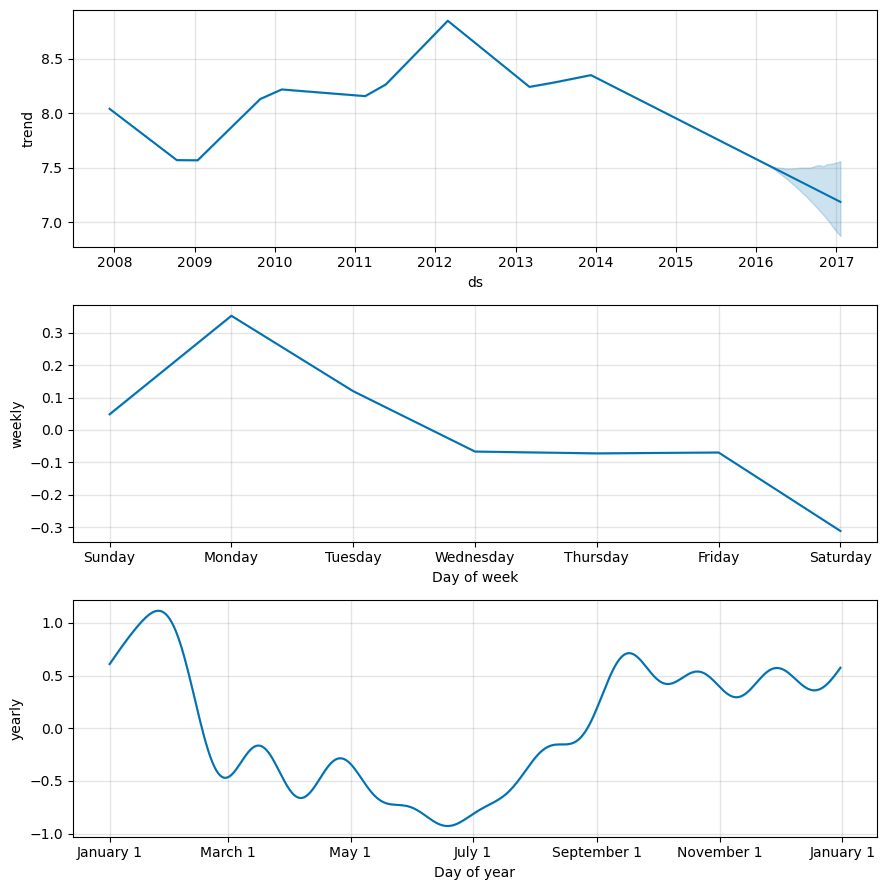

In [7]:
fig2 = m.plot_components(forecast)



# Covid

In [8]:
df_covid_w = pd.read_csv('../Data/silver/covid_data_weekly.csv')
df_covid_w.head()

,country,date,new_cases,cases
0,Brazil,2020-01-20,0,0
1,Brazil,2020-01-27,0,0
2,Brazil,2020-02-03,0,0
3,Brazil,2020-02-10,0,0
4,Brazil,2020-02-17,0,0


09:10:42 - cmdstanpy - INFO - Chain [1] start processing
09:10:42 - cmdstanpy - INFO - Chain [1] done processing


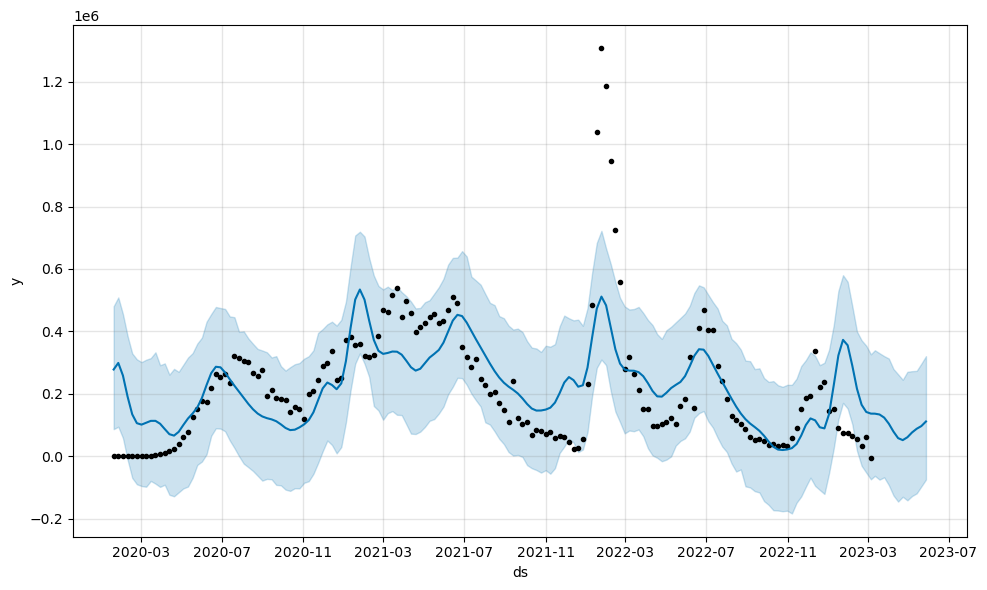

In [36]:
# Filter for a specific country (e.g., Brazil)
country = "Brazil"
df_country = df_covid_w[df_covid_w['country'] == country]

# Prepare the data for Prophet
df_prophet = df_country[['date', 'new_cases']].rename(columns={'date': 'ds', 'new_cases': 'y'})

# Convert 'ds' column to datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future predictions (e.g., forecast for the next 12 weeks)
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()


09:10:07 - cmdstanpy - INFO - Chain [1] start processing
09:10:08 - cmdstanpy - INFO - Chain [1] done processing


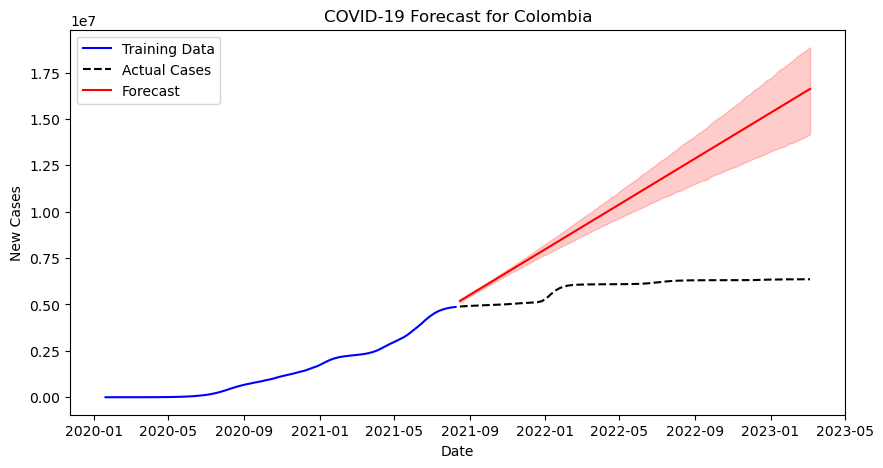

In [35]:


# Filter for a specific country (e.g., Brazil)
country = "Colombia"
df_country = df_covid_w[df_covid_w['country'] == country]

# Prepare the data for Prophet
df_country = df_country[['date', 'cases']].rename(columns={'date': 'ds', 'cases': 'y'})
df_country['ds'] = pd.to_datetime(df_country['ds'])  # Ensure datetime format

# Sort by date
df_country = df_country.sort_values(by='ds')

# Split data into two halves
mid_index = len(df_country) // 2
df_train = df_country.iloc[:mid_index]  # First half for training
df_test = df_country.iloc[mid_index:]   # Second half for testing

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_train)

# Make future predictions for the remaining period
future = df_test[['ds']]  # Use test dates for forecasting
forecast = model.predict(future)

# Plot the forecast vs actual values
plt.figure(figsize=(10, 5))
plt.plot(df_train['ds'], df_train['y'], label='Training Data', color='blue')
plt.plot(df_test['ds'], df_test['y'], label='Actual Cases', color='black', linestyle='dashed')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)  # Confidence interval
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title(f'COVID-19 Forecast for {country}')
plt.legend()
plt.show()



## Loop all countries

09:15:52 - cmdstanpy - INFO - Chain [1] start processing
09:15:52 - cmdstanpy - INFO - Chain [1] done processing
09:15:52 - cmdstanpy - INFO - Chain [1] start processing
09:15:52 - cmdstanpy - INFO - Chain [1] done processing
09:15:52 - cmdstanpy - INFO - Chain [1] start processing
09:15:52 - cmdstanpy - INFO - Chain [1] done processing
09:15:53 - cmdstanpy - INFO - Chain [1] start processing
09:15:53 - cmdstanpy - INFO - Chain [1] done processing
09:15:53 - cmdstanpy - INFO - Chain [1] start processing
09:15:53 - cmdstanpy - INFO - Chain [1] done processing
09:15:53 - cmdstanpy - INFO - Chain [1] start processing
09:15:53 - cmdstanpy - INFO - Chain [1] done processing
09:15:54 - cmdstanpy - INFO - Chain [1] start processing
09:15:54 - cmdstanpy - INFO - Chain [1] done processing
09:15:54 - cmdstanpy - INFO - Chain [1] start processing
09:15:54 - cmdstanpy - INFO - Chain [1] done processing
09:15:54 - cmdstanpy - INFO - Chain [1] start processing
09:15:54 - cmdstanpy - INFO - Chain [1]

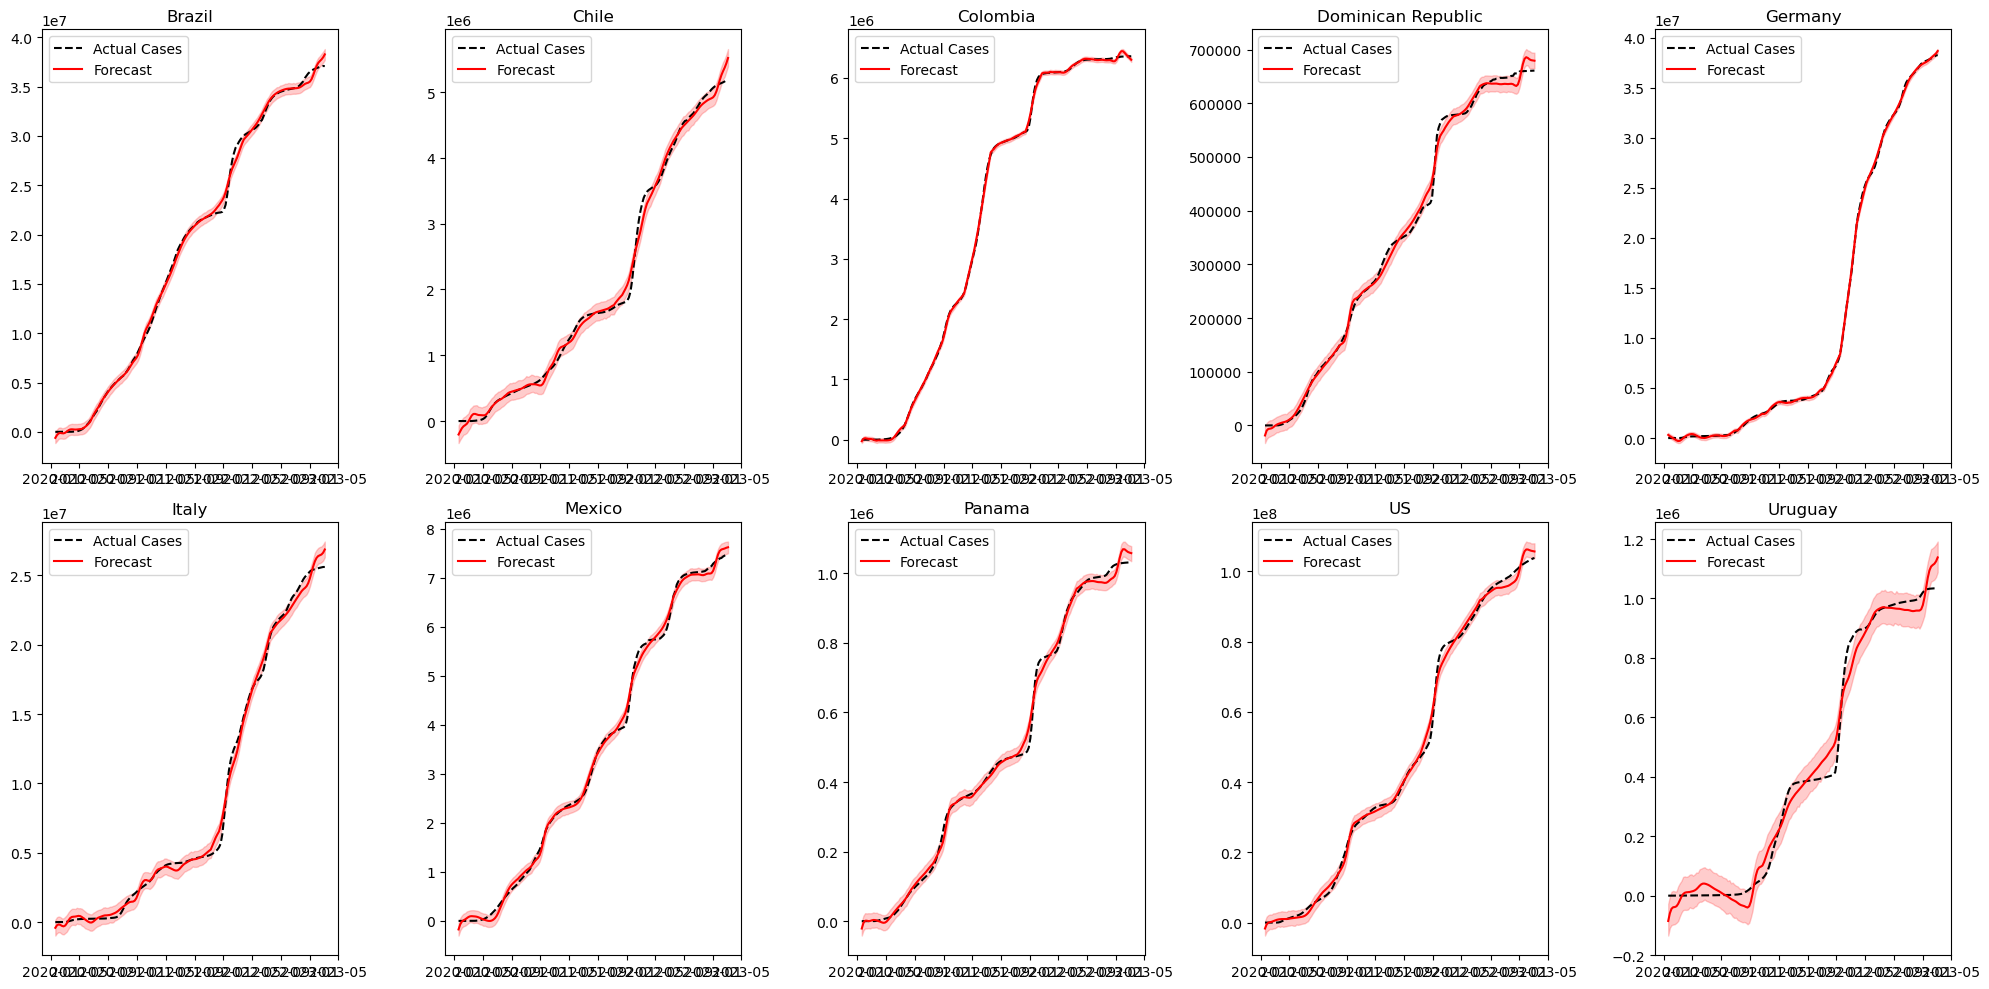

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Get unique countries
countries = df_covid_w['country'].unique()

# Dictionary to store evaluation metrics
metrics = {}

# Set up plot grid (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Loop through each country
for i, country in enumerate(countries):
    # Filter dataset for the country
    df_country = df_covid_w[df_covid_w['country'] == country]
    
    # Prepare data for Prophet
    df_country = df_country[['date', 'cases']].rename(columns={'date': 'ds', 'cases': 'y'})
    df_country['ds'] = pd.to_datetime(df_country['ds'])  # Ensure datetime format
    
    # Fit Prophet model
    model = Prophet()
    model.fit(df_country)
    
    # Make predictions for the same period
    future = df_country[['ds']]
    forecast = model.predict(future)
    
    # Compute R² and RMSE on training set
    r2 = r2_score(df_country['y'], forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(df_country['y'], forecast['yhat']))
    
    # Store metrics
    metrics[country] = {'R2': r2, 'RMSE': rmse}
    
    # Plot results
    axes[i].plot(df_country['ds'], df_country['y'], label='Actual Cases', color='black', linestyle='dashed')
    axes[i].plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    axes[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    axes[i].set_title(country)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [40]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df

,R2,RMSE
Brazil,0.998919,4.246247e+05
Chile,0.996667,1.014942e+05
Colombia,0.999872,2.793433e+04
Dominican Republic,0.997644,1.139169e+04
Germany,0.999866,1.624632e+05
Italy,0.997531,4.531905e+05
Mexico,0.998606,9.702998e+04
Panama,0.997848,1.665720e+04
US,0.998020,1.626782e+06
Uruguay,0.988978,4.312899e+04


## Train - Test Prophet

09:21:16 - cmdstanpy - INFO - Chain [1] start processing
09:21:17 - cmdstanpy - INFO - Chain [1] done processing
09:21:17 - cmdstanpy - INFO - Chain [1] start processing
09:21:17 - cmdstanpy - INFO - Chain [1] done processing
09:21:18 - cmdstanpy - INFO - Chain [1] start processing
09:21:18 - cmdstanpy - INFO - Chain [1] done processing
09:21:18 - cmdstanpy - INFO - Chain [1] start processing
09:21:19 - cmdstanpy - INFO - Chain [1] done processing
09:21:19 - cmdstanpy - INFO - Chain [1] start processing
09:21:19 - cmdstanpy - INFO - Chain [1] done processing
09:21:20 - cmdstanpy - INFO - Chain [1] start processing
09:21:20 - cmdstanpy - INFO - Chain [1] done processing
09:21:20 - cmdstanpy - INFO - Chain [1] start processing
09:21:21 - cmdstanpy - INFO - Chain [1] done processing
09:21:21 - cmdstanpy - INFO - Chain [1] start processing
09:21:21 - cmdstanpy - INFO - Chain [1] done processing
09:21:21 - cmdstanpy - INFO - Chain [1] start processing
09:21:22 - cmdstanpy - INFO - Chain [1]

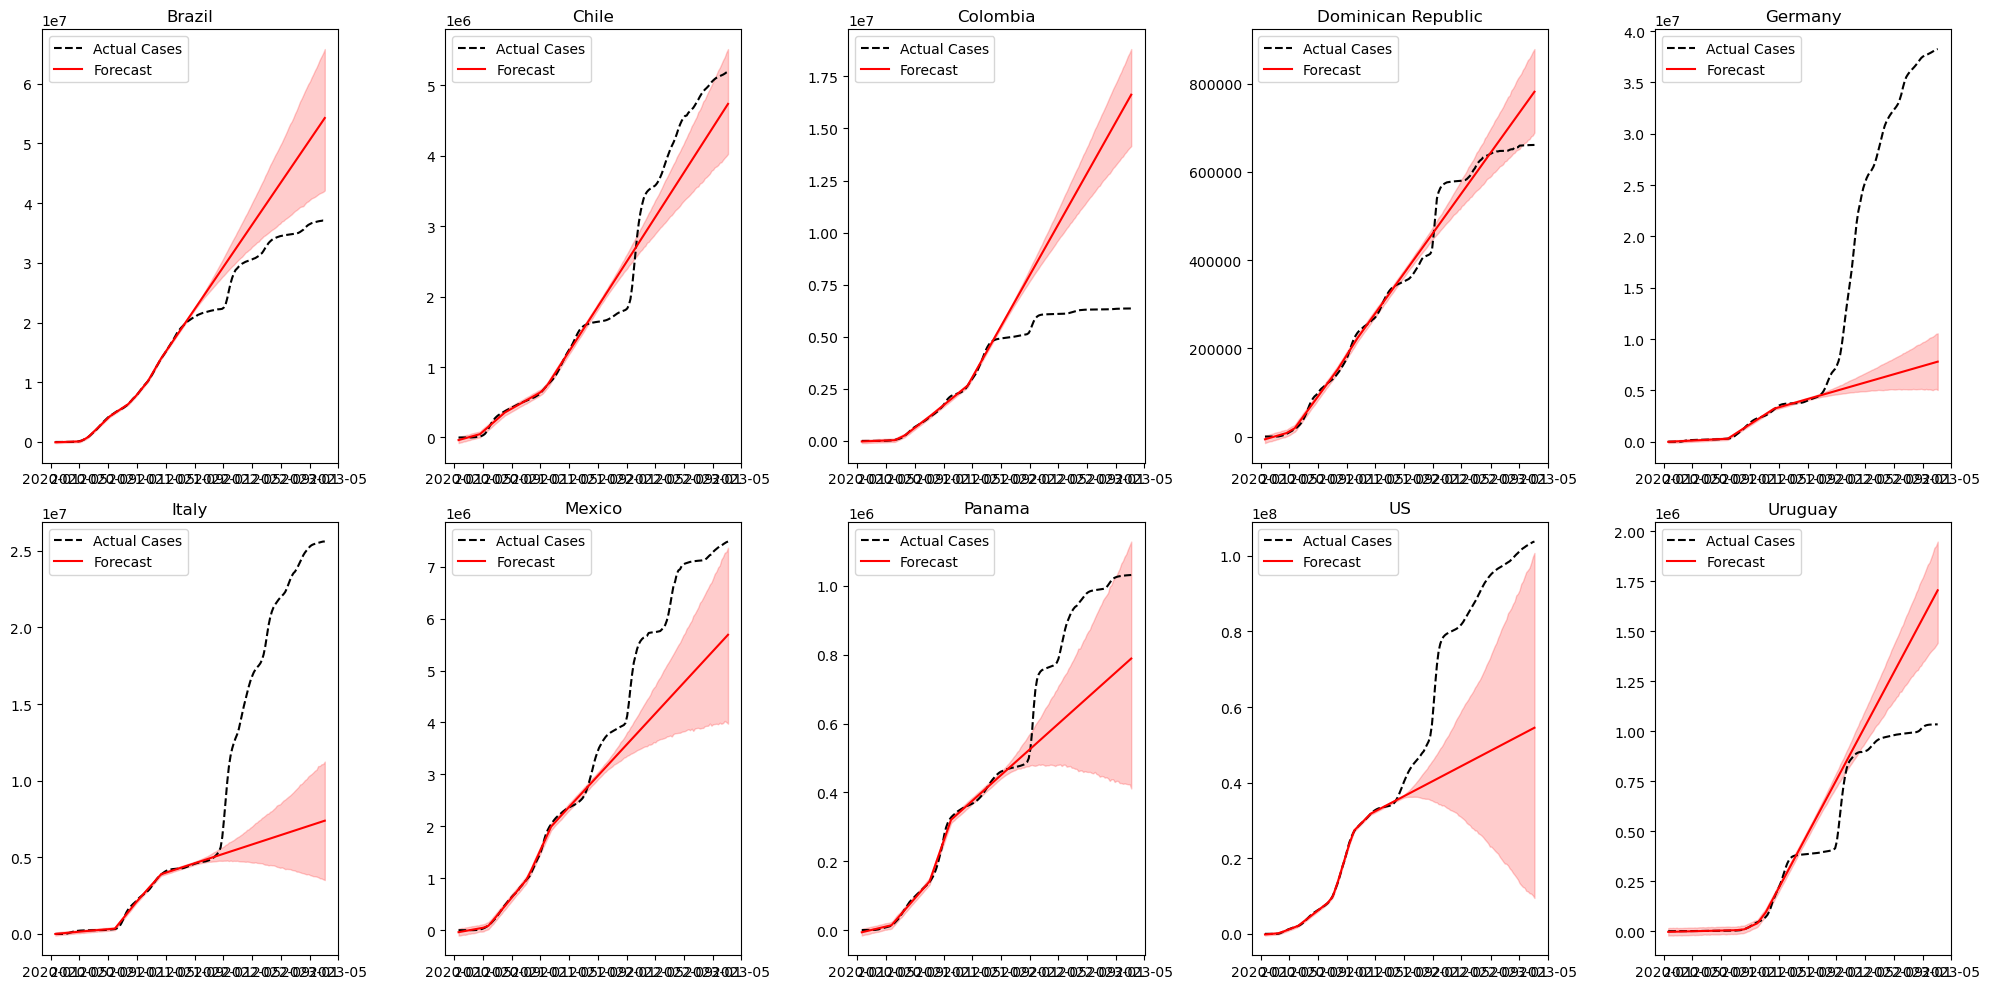

In [43]:
# Dictionary to store evaluation metrics
metrics = {}

# Set up plot grid (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Loop through each country
for i, country in enumerate(countries):
    # Filter dataset for the country
    df_country = df_covid_w[df_covid_w['country'] == country]
    
    # Prepare data for Prophet
    df_country = df_country[['date', 'cases']].rename(columns={'date': 'ds', 'cases': 'y'})
    df_country['ds'] = pd.to_datetime(df_country['ds'])  # Ensure datetime format
    df_country = df_country.sort_values(by='ds')

    # Split into training and testing sets
    mid_index = len(df_country) // 2
    df_train = df_country.iloc[:mid_index]  # First half for training
    df_test = df_country.iloc[mid_index:]   # Second half for testing

    # Fit Prophet model on training set
    model = Prophet()
    model.fit(df_train)

    # Make future predictions for train + test period
    future = df_country[['ds']]  # Use full dataset dates
    forecast = model.predict(future)

    # Extract only test period for evaluation
    forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

    # Compute R² and RMSE on the test set
    r2 = r2_score(df_test['y'], forecast_test['yhat'])
    rmse = np.sqrt(mean_squared_error(df_test['y'], forecast_test['yhat']))
    
    # Store metrics
    metrics[country] = {'R2': r2, 'RMSE': rmse}
    
    # Plot results
    axes[i].plot(df_country['ds'], df_country['y'], label='Actual Cases', color='black', linestyle='dashed')
    axes[i].plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    axes[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    axes[i].set_title(country)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [44]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df

,R2,RMSE
Brazil,-1.453055,8.913212e+06
Chile,0.808445,5.708251e+05
Colombia,-115.656698,5.774772e+06
Dominican Republic,0.778015,5.085361e+04
Germany,-1.564963,2.051909e+07
Italy,-1.528855,1.229260e+07
Mexico,-0.340396,1.612174e+06
Panama,-0.038600,2.192246e+05
US,-2.180491,3.768784e+07
Uruguay,-0.733388,3.315210e+05


# Epidemics

In [52]:
df_dengue = pd.read_csv('../Data/silver/dengue_no_split.csv')
df_zika = pd.read_csv('../Data/silver/zika.csv')
df_zika.drop(columns=['Unnamed: 0'], inplace=True)
df_chic = pd.read_csv('../Data/silver/chicunguya.csv')
df_chic.drop(columns=['Unnamed: 0'], inplace=True)
df_varicela = pd.read_csv('../Data/silver/varicela.csv')

In [53]:
df_dengue.head()

,SEMANA,ANO,Casos,DATE
0,1,2007,315,2007-01-01
1,2,2007,236,2007-01-08
2,3,2007,252,2007-01-15
3,4,2007,305,2007-01-22
4,5,2007,360,2007-01-29


In [54]:
df_zika.head()

,SEMANA,ANO,Casos,DATE
0,32,2015,26,2015-08-03
1,33,2015,23,2015-08-10
2,34,2015,14,2015-08-17
3,35,2015,6,2015-08-24
4,36,2015,9,2015-08-31


In [55]:
df_chic.head()

,SEMANA,ANO,Casos,DATE
0,23,2014,13,2014-06-02
1,24,2014,10,2014-06-09
2,25,2014,8,2014-06-16
3,26,2014,6,2014-06-23
4,27,2014,8,2014-06-30


In [56]:
df_varicela.head()

,SEMANA,ANO,Casos,DATE
0,1,2007,250,2007-01-01
1,2,2007,307,2007-01-08
2,3,2007,301,2007-01-15
3,4,2007,266,2007-01-22
4,5,2007,357,2007-01-29


In [58]:
# save date columns as datetime
df_dengue['DATE'] = pd.to_datetime(df_dengue['DATE'])
df_zika['DATE'] = pd.to_datetime(df_zika['DATE'])
df_chic['DATE'] = pd.to_datetime(df_chic['DATE'])
df_varicela['DATE'] = pd.to_datetime(df_varicela['DATE'])


09:38:15 - cmdstanpy - INFO - Chain [1] start processing
09:38:15 - cmdstanpy - INFO - Chain [1] done processing
09:38:15 - cmdstanpy - INFO - Chain [1] start processing
09:38:15 - cmdstanpy - INFO - Chain [1] done processing
09:38:16 - cmdstanpy - INFO - Chain [1] start processing
09:38:16 - cmdstanpy - INFO - Chain [1] done processing
09:38:16 - cmdstanpy - INFO - Chain [1] start processing
09:38:16 - cmdstanpy - INFO - Chain [1] done processing


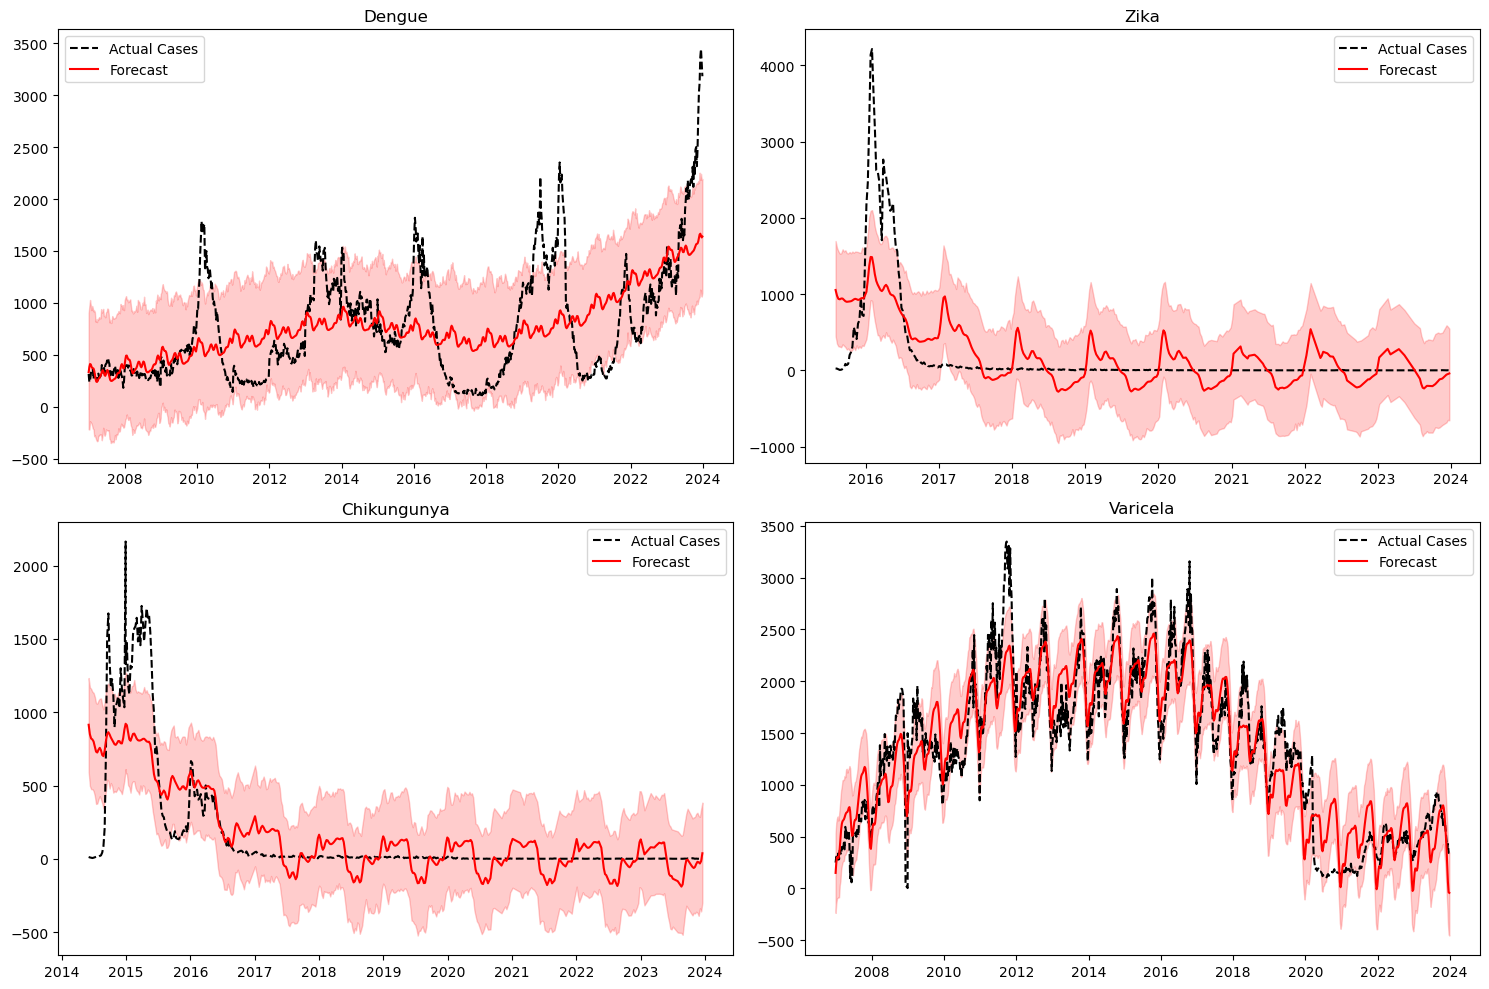

In [59]:
# Define dataset dictionary
datasets = {
    "Dengue": df_dengue,
    "Zika": df_zika,
    "Chikungunya": df_chic,
    "Varicela": df_varicela
}

# Dictionary to store evaluation metrics
metrics = {}

# Set up plot grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Loop through each dataset
for i, (name, df) in enumerate(datasets.items()):
    # Prepare data for Prophet
    df = df[['DATE', 'Casos']].rename(columns={'DATE': 'ds', 'Casos': 'y'})
    df['ds'] = pd.to_datetime(df['ds'])  # Ensure datetime format
    df = df.sort_values(by='ds')

    # Fit Prophet model
    model = Prophet()
    model.fit(df)

    # Make future predictions for the same period
    future = df[['ds']]
    forecast = model.predict(future)

    # Compute R² and RMSE on the training set
    r2 = r2_score(df['y'], forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(df['y'], forecast['yhat']))
    
    # Store metrics
    metrics[name] = {'R2': r2, 'RMSE': rmse}

    # Plot actual vs forecasted
    axes[i].plot(df['ds'], df['y'], label='Actual Cases', color='black', linestyle='dashed')
    axes[i].plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    axes[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    axes[i].set_title(name)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [60]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df

,R2,RMSE
Dengue,0.349917,446.745701
Zika,0.455893,489.207905
Chikungunya,0.601539,258.568350
Varicela,0.835139,305.160212


09:40:59 - cmdstanpy - INFO - Chain [1] start processing
09:41:00 - cmdstanpy - INFO - Chain [1] done processing
09:41:00 - cmdstanpy - INFO - Chain [1] start processing
09:41:00 - cmdstanpy - INFO - Chain [1] done processing
09:41:00 - cmdstanpy - INFO - Chain [1] start processing
09:41:01 - cmdstanpy - INFO - Chain [1] done processing
09:41:01 - cmdstanpy - INFO - Chain [1] start processing
09:41:02 - cmdstanpy - INFO - Chain [1] done processing


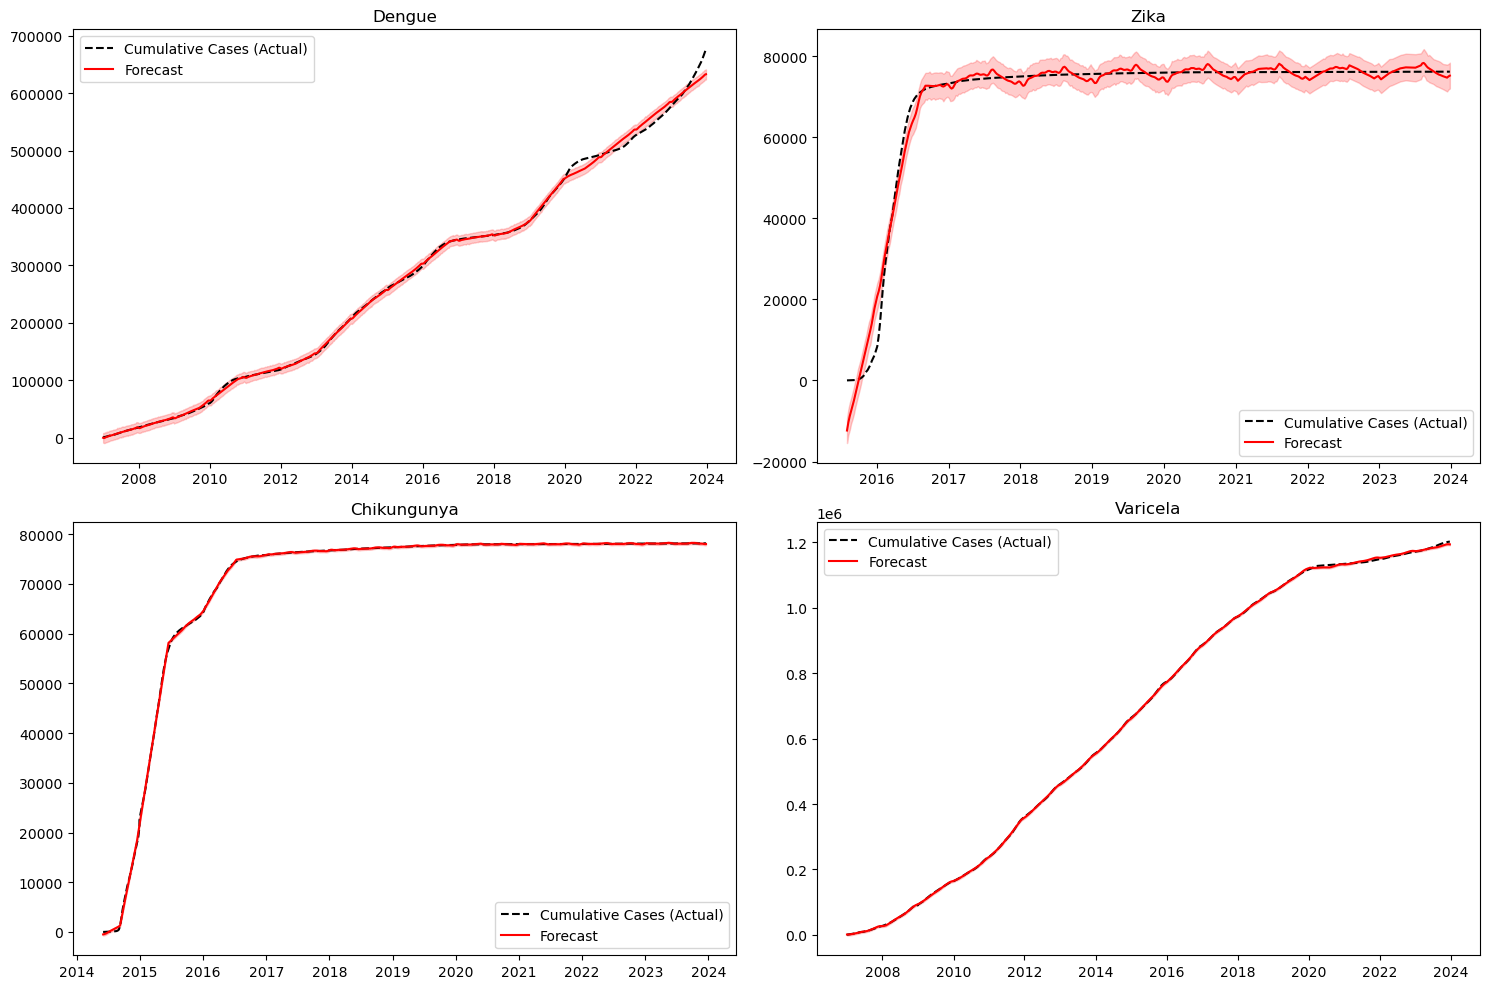

In [61]:


# Define dataset dictionary
datasets = {
    "Dengue": df_dengue,
    "Zika": df_zika,
    "Chikungunya": df_chic,
    "Varicela": df_varicela
}

# Dictionary to store evaluation metrics
metrics = {}

# Set up plot grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Loop through each dataset
for i, (name, df) in enumerate(datasets.items()):
    # Ensure data is sorted by date
    df = df[['DATE', 'Casos']].rename(columns={'DATE': 'ds', 'Casos': 'y'})
    df['ds'] = pd.to_datetime(df['ds'])  # Ensure datetime format
    df = df.sort_values(by='ds')

    # Compute cumulative cases
    df['y'] = df['y'].cumsum()

    # Fit Prophet model
    model = Prophet()
    model.fit(df)

    # Make future predictions for the same period
    future = df[['ds']]
    forecast = model.predict(future)

    # Compute R² and RMSE on the training set
    r2 = r2_score(df['y'], forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(df['y'], forecast['yhat']))
    
    # Store metrics
    metrics[name] = {'R2': r2, 'RMSE': rmse}

    # Plot actual vs forecasted
    axes[i].plot(df['ds'], df['y'], label='Cumulative Cases (Actual)', color='black', linestyle='dashed')
    axes[i].plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    axes[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    axes[i].set_title(name)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [62]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df

,R2,RMSE
Dengue,0.998688,6828.261209
Zika,0.983493,2514.570571
Chikungunya,0.999908,192.124115
Varicela,0.999970,2248.948968


09:49:19 - cmdstanpy - INFO - Chain [1] start processing
09:49:19 - cmdstanpy - INFO - Chain [1] done processing
09:49:20 - cmdstanpy - INFO - Chain [1] start processing
09:49:20 - cmdstanpy - INFO - Chain [1] done processing
09:49:20 - cmdstanpy - INFO - Chain [1] start processing
09:49:20 - cmdstanpy - INFO - Chain [1] done processing
09:49:21 - cmdstanpy - INFO - Chain [1] start processing
09:49:21 - cmdstanpy - INFO - Chain [1] done processing


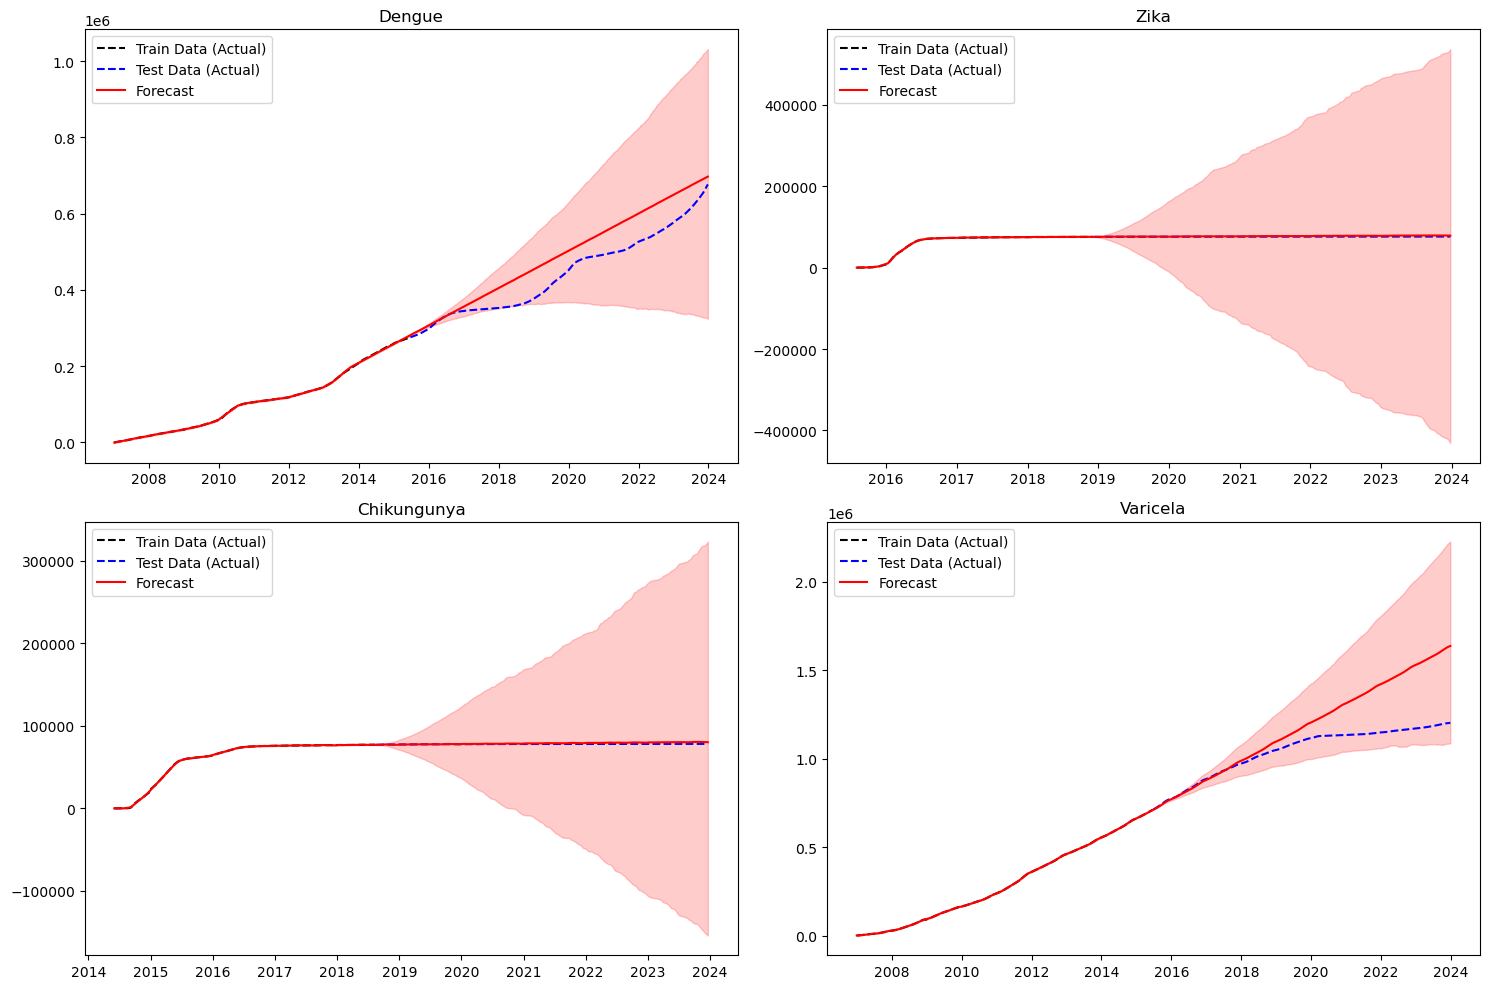

In [68]:
# Define dataset dictionary
datasets = {
    "Dengue": df_dengue,
    "Zika": df_zika,
    "Chikungunya": df_chic,
    "Varicela": df_varicela
}

# Dictionary to store evaluation metrics
metrics = {}

# Set up plot grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Loop through each dataset
for i, (name, df) in enumerate(datasets.items()):
    # Prepare data
    df = df[['DATE', 'Casos']].rename(columns={'DATE': 'ds', 'Casos': 'y'})
    df['ds'] = pd.to_datetime(df['ds'])  # Ensure datetime format
    df = df.sort_values(by='ds')

    # Compute cumulative cases
    df['y'] = df['y'].cumsum()

    # Split data (50% train - 50% test)
    split_index = len(df) // 2
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]

    # Fit Prophet model on training data
    model = Prophet()
    model.fit(train_df)

    # Make future predictions for the full dataset (train + test period)
    future = df[['ds']]
    forecast = model.predict(future)

    # Compute R² and RMSE on test data only
    test_forecast = forecast.iloc[split_index:]  # Get predictions for the test set
    r2 = r2_score(test_df['y'], test_forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(test_df['y'], test_forecast['yhat']))
    
    # Store metrics
    metrics[name] = {'R2': r2, 'RMSE': rmse}

    # Plot actual vs forecasted values
    axes[i].plot(train_df['ds'], train_df['y'], label='Train Data (Actual)', color='black', linestyle='dashed')
    axes[i].plot(test_df['ds'], test_df['y'], label='Test Data (Actual)', color='blue', linestyle='dashed')
    axes[i].plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    axes[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    axes[i].set_title(name)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [69]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df

,R2,RMSE
Dengue,0.709495,55867.376610
Zika,-71.902987,1366.269454
Chikungunya,-16.475088,1129.176692
Varicela,-1.069039,197356.896849


09:49:22 - cmdstanpy - INFO - Chain [1] start processing
09:49:22 - cmdstanpy - INFO - Chain [1] done processing
09:49:23 - cmdstanpy - INFO - Chain [1] start processing
09:49:23 - cmdstanpy - INFO - Chain [1] done processing
09:49:23 - cmdstanpy - INFO - Chain [1] start processing
09:49:23 - cmdstanpy - INFO - Chain [1] done processing
09:49:23 - cmdstanpy - INFO - Chain [1] start processing
09:49:24 - cmdstanpy - INFO - Chain [1] done processing


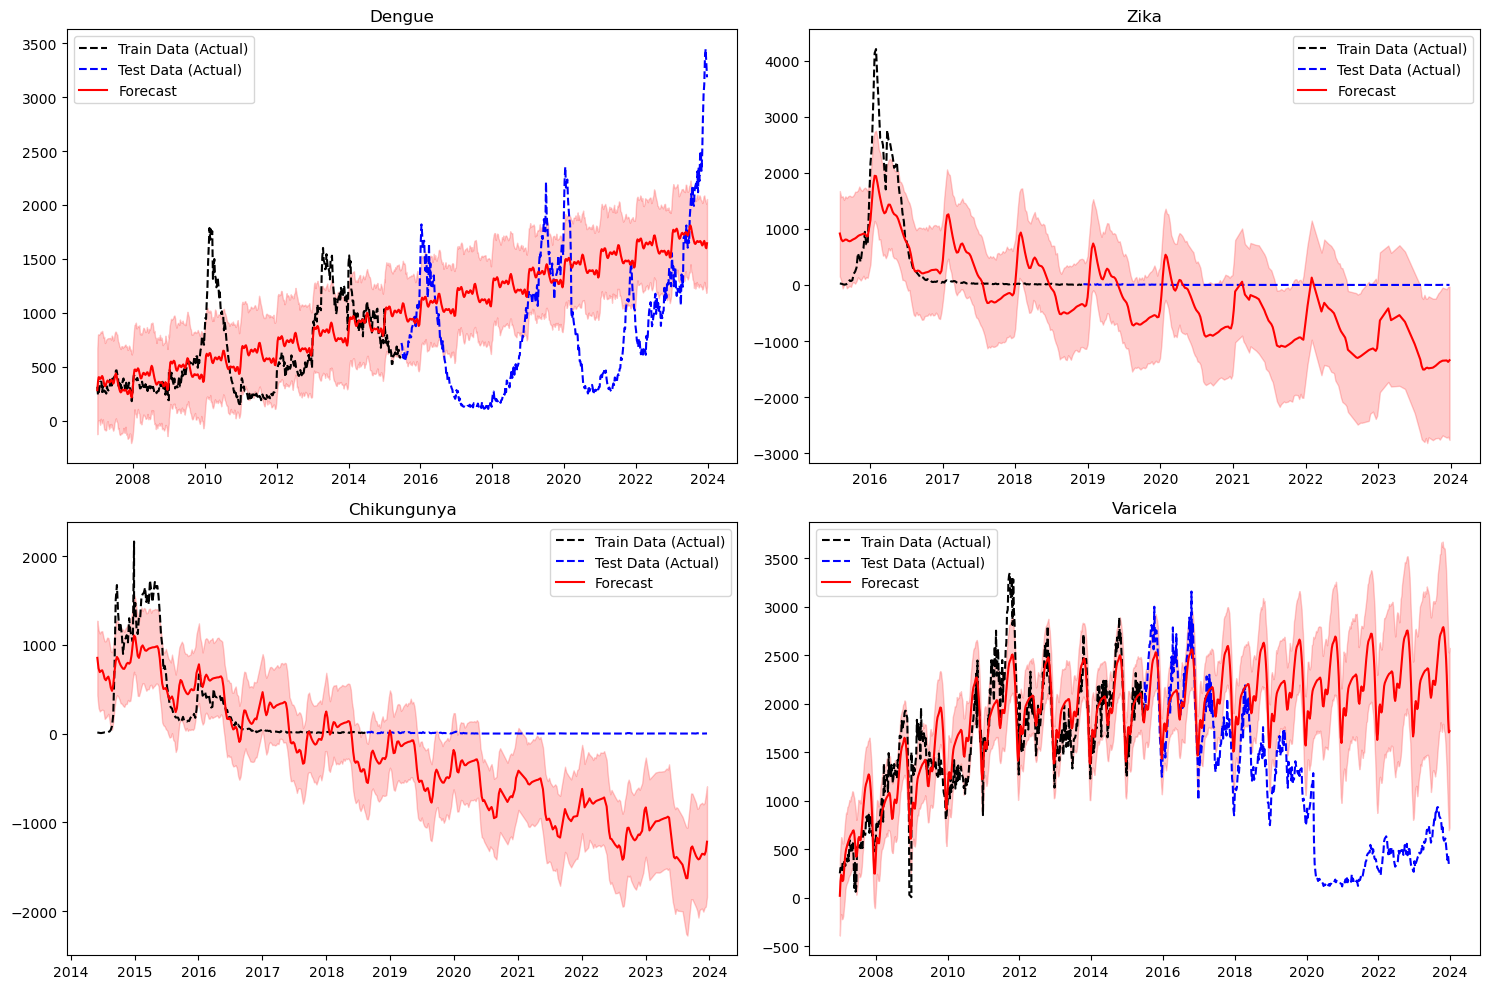

In [70]:
# Define dataset dictionary
datasets = {
    "Dengue": df_dengue,
    "Zika": df_zika,
    "Chikungunya": df_chic,
    "Varicela": df_varicela
}

# Dictionary to store evaluation metrics
metrics = {}

# Set up plot grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Loop through each dataset
for i, (name, df) in enumerate(datasets.items()):
    # Prepare data
    df = df[['DATE', 'Casos']].rename(columns={'DATE': 'ds', 'Casos': 'y'})
    df['ds'] = pd.to_datetime(df['ds'])  # Ensure datetime format
    df = df.sort_values(by='ds')

    # Compute cumulative cases
    #df['y'] = df['y'].cumsum()

    # Split data (50% train - 50% test)
    split_index = len(df) // 2
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]

    # Fit Prophet model on training data
    model = Prophet()
    model.fit(train_df)

    # Make future predictions for the full dataset (train + test period)
    future = df[['ds']]
    forecast = model.predict(future)

    # Compute R² and RMSE on test data only
    test_forecast = forecast.iloc[split_index:]  # Get predictions for the test set
    r2 = r2_score(test_df['y'], test_forecast['yhat'])
    rmse = np.sqrt(mean_squared_error(test_df['y'], test_forecast['yhat']))
    
    # Store metrics
    metrics[name] = {'R2': r2, 'RMSE': rmse}

    # Plot actual vs forecasted values
    axes[i].plot(train_df['ds'], train_df['y'], label='Train Data (Actual)', color='black', linestyle='dashed')
    axes[i].plot(test_df['ds'], test_df['y'], label='Test Data (Actual)', color='blue', linestyle='dashed')
    axes[i].plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
    axes[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    axes[i].set_title(name)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

    

In [71]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df

,R2,RMSE
Dengue,-0.338121,756.075399
Zika,-51535.289392,750.721220
Chikungunya,-27610.933961,811.053299
Varicela,-2.053012,1349.513880
